<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

lo siento no sabia que se borrarian al subir el archivo ya me habian dado un feedback empece con la plataforma y cuando me mandaron el resultado lo corregi en ambos pero segui en anaconda y por no querer estar traspasando los datos se me hizo facil ponerle subir archivo y se borro al parecer todo estaba bien me puso un comentario porque habia usado el how='outer' y otra es how='inner' y lo habia corregido en anterior aqui tambien pondre el comentario el que me reviso anteriormente fue Hesus con H :D tambien me dio un buen feedback que no lo he cumplido por el tiempo y me dijo un maestro en el co lerning que por mientras lo dejara asi que estaba bien y que despues lo tratara me dijo que usara el where() en la parte de la funsion espero me pueda dar una pista de como usarlo que la verdad no se como lo haria pero lo tratare de hacer porque mis apuntes de las teorias no le entiendo como usarlo pero tratare y muchas gracias por sus comentarios y motivacion estuvo este proyecto muy extenso, largo pero muy divertido porque puse en practica la teoria y algunas cosas hasta tuve que investigar me ayudo tambien a ser creativo para saber como llegar al resultado de una u otra forma trate de sacar lo que necesitaba para hacer mi analisis atte elpidio lozano.</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[El proposito de este proyecto es llegar a la conclusion de cual es el mejor Plan Tarifario con cual la empresa gana mejor dinero pero sin perder clientela y mejorando satisfaciendo los clientes y porque alguna estrategia para llegar a mas clientes que apliquen a algun de estos planes tarifarios, ocupando algunas estadisticas y probabilidades las cual nos daran el resultado a decuado, empecemos limpiando los datos para su analisis.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st




## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
llamadas = pd.read_csv("megaline_calls.csv")
internet = pd.read_csv("megaline_internet.csv")
mensajes = pd.read_csv("megaline_messages.csv")
tarifas = pd.read_csv("megaline_plans.csv")
usuarios = pd.read_csv("megaline_users.csv")


## Preparar los datos

In [19]:
def info_gral(datos):
    print("Primeras Filas")
    print(datos.head())
    print()
    print("Datos Generales")
    print(datos.info())
    print()
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print()
    print("Revision de Duplicados")
    print(datos.duplicated().sum())

In [21]:
def redondeo_para_arriba(duracion):
    redondeo =np.ceil(duracion)
    return redondeo

In [23]:
def redondeo_gb(mb):
    redondeo = np.ceil(mb/1024)
    return redondeo

## Tarifas

In [6]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
# Imprime una muestra de los datos para las tarifas

In [25]:
info_gral(tarifas)

Primeras Filas
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
# Imprime una muestra de datos para usuarios

In [9]:
info_gral(usuarios)

Primeras Filas
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 

[Observando la informacion que nos arroja no hay datos ausente ni duplicados hay que convertir las dos columnas de fechas con string a formato datetime tambien hay que poner todo en minuscuas y revisar si hay algun dato duplicado]

### Corregir los datos

In [10]:
usuarios = usuarios.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [11]:
usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'])
usuarios['churn_date'] = pd.to_datetime(usuarios['churn_date'])
usuarios['reg_mes']=usuarios['reg_date'].dt.month


### Enriquecer los datos

[Se agrega la revision de los datos que esten corregidos en las fechas y en los nombres de los usuarios y ciudad asi como se revisa tambien si con esto se encontro algun duplicado.]

In [12]:
info_gral(usuarios)

Primeras Filas
   user_id first_name  last_name  age                                   city  \
0     1000   anamaria      bauer   45  atlanta-sandy springs-roswell, ga msa   
1     1001     mickey  wilkerson   28        seattle-tacoma-bellevue, wa msa   
2     1002     carlee    hoffman   36   las vegas-henderson-paradise, nv msa   
3     1003   reynaldo    jenkins   52                          tulsa, ok msa   
4     1004    leonila   thompson   40        seattle-tacoma-bellevue, wa msa   

    reg_date      plan churn_date  reg_mes  
0 2018-12-24  ultimate        NaT       12  
1 2018-08-13      surf        NaT        8  
2 2018-10-21      surf        NaT       10  
3 2018-01-28      surf        NaT        1  
4 2018-05-23      surf        NaT        5  

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
# Imprime una muestra de datos para las llamadas

In [14]:
info_gral(llamadas)

Primeras Filas
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

Revision de Datos Ausentes
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Revision de Duplicados
0


[Se muestran la informacion general y la muestras de datos, no se encuentras problemas de datos ausentes ni datos duplicados solo hay un detalle que es la fecha que la vemos como objeto y hay que cambiarla a datos de fecha para posteriormente usarla en analis lo haremos con el metodo de pandas pd.to_datetime(), tambien hay que redondear los minutos de las llamadas usaremos un metodo de pandas llamado np.ceil()pero hare una funcion para despues usarla igual para todo lo que se necesite dedonder como los mb despues]

### Corregir los datos

In [15]:
llamadas['call_date'] = pd.to_datetime(llamadas['call_date'])
print(llamadas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [16]:
llamadas['mes']=llamadas['call_date'].dt.month

In [17]:
llamadas['llamadas_redondeada']=llamadas['duration'].apply(redondeo_para_arriba)
llamadas

,id,user_id,call_date,duration,mes,llamadas_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11,9.0
137731,1499_200,1499,2018-10-20,10.89,10,11.0
137732,1499_201,1499,2018-09-21,8.12,9,9.0
137733,1499_202,1499,2018-10-10,0.37,10,1.0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
# Imprime una muestra de datos para los mensajes

In [19]:
info_gral(mensajes)

Primeras Filas
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Revision de Datos Ausentes
id              0
user_id         0
message_date    0
dtype: int64

Revision de Duplicados
0


[No se encontraron datos ausentes, ni duplicados lo unico que se observo fue el formato de fecha]

### Corregir los datos

In [20]:
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'])
print(mensajes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
mensajes['mes']=mensajes['message_date'].dt.month
mensajes

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
# Imprime una muestra de datos para el tráfico de internet

In [23]:
info_gral(internet)

Primeras Filas
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

Revision de Datos Ausentes
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Revision de Duplicados
0


[Solo se encontro corregir los datos fecha y redondear los mb utilizados con el comando ya echo para rendonder que se llama redondeo_para_arriba, tambien se hizo una columna de mes sacandola de la fecha ]

### Corregir los datos

In [24]:
internet['mb_redondeado']=internet['mb_used'].apply(redondeo_para_arriba)
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['mes']=internet['session_date'].dt.month
internet

,id,user_id,session_date,mb_used,mb_redondeado,mes
0,1000_13,1000,2018-12-29,89.86,90.0,12
1,1000_204,1000,2018-12-31,0.00,0.0,12
2,1000_379,1000,2018-12-28,660.40,661.0,12
3,1000_413,1000,2018-12-26,270.99,271.0,12
4,1000_442,1000,2018-12-27,880.22,881.0,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,219.0,10
104821,1499_216,1499,2018-12-30,304.72,305.0,12
104822,1499_217,1499,2018-09-22,292.75,293.0,9
104823,1499_218,1499,2018-12-07,0.00,0.0,12


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

In [27]:
llamadas_mes_usuario = llamadas.pivot_table(index=['user_id','mes'],
                         values='llamadas_redondeada',
                         aggfunc=['count','sum'])
llamadas_mes_usuario.columns=['llamadas_hechas','minutos_usados']
llamadas_mes_usuario.reset_index(inplace=True)
llamadas_mes_usuario

,user_id,mes,llamadas_hechas,minutos_usados
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_mes_usuario = mensajes.pivot_table(index=['user_id','mes'],
                         values='id',
                         aggfunc=['count'])
mensajes_mes_usuario.columns = ['total_de_mensajes']
mensajes_mes_usuario.reset_index(inplace=True)
mensajes_mes_usuario


,user_id,mes,total_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_mes_usuario = internet.pivot_table(index=['user_id','mes'],
                         values='mb_redondeado',
                         aggfunc=['sum'])
internet_mes_usuario.columns = ['suma_mb']
internet_mes_usuario.reset_index(inplace=True)
internet_mes_usuario

,user_id,mes,suma_mb
0,1000,12,1903.0
1,1001,8,6929.0
2,1001,9,13333.0
3,1001,10,22356.0
4,1001,11,18524.0
...,...,...,...
2272,1498,12,23160.0
2273,1499,9,13004.0
2274,1499,10,19515.0
2275,1499,11,16834.0


In [30]:
internet_mes_usuario['gb_usados']=internet_mes_usuario['suma_mb'].apply(redondeo_gb)
internet_mes_usuario

,user_id,mes,suma_mb,gb_usados
0,1000,12,1903.0,2.0
1,1001,8,6929.0,7.0
2,1001,9,13333.0,14.0
3,1001,10,22356.0,22.0
4,1001,11,18524.0,19.0
...,...,...,...,...
2272,1498,12,23160.0,23.0
2273,1499,9,13004.0,13.0
2274,1499,10,19515.0,20.0
2275,1499,11,16834.0,17.0


[despues de hacer de cada tabla limpio y calcular los mensajes, llamadas e internet ahora prodecederemos a juntar todas las tablas para hacer una tabla maestra para trabajar]

In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
llamadas_mensajes = llamadas_mes_usuario.merge(mensajes_mes_usuario, on=['user_id','mes'],how='outer')
internet_llamadas_mensajes = llamadas_mensajes.merge(internet_mes_usuario, on=['user_id','mes'], how='outer')
consumo_usuarios=internet_llamadas_mensajes.merge(usuarios[['user_id','city','plan']], on='user_id',how='outer')
consumo_usuarios

,user_id,mes,llamadas_hechas,minutos_usados,total_de_mensajes,suma_mb,gb_usados,city,plan
0,1000,12.0,16.0,124.0,11.0,1903.0,2.0,"atlanta-sandy springs-roswell, ga msa",ultimate
1,1001,8.0,27.0,182.0,30.0,6929.0,7.0,"seattle-tacoma-bellevue, wa msa",surf
2,1001,9.0,49.0,315.0,44.0,13333.0,14.0,"seattle-tacoma-bellevue, wa msa",surf
3,1001,10.0,65.0,393.0,53.0,22356.0,22.0,"seattle-tacoma-bellevue, wa msa",surf
4,1001,11.0,64.0,426.0,36.0,18524.0,19.0,"seattle-tacoma-bellevue, wa msa",surf
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,"boston-cambridge-newton, ma-nh msa",surf
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,"colorado springs, co msa",surf
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,"denver-aurora-lakewood, co msa",surf
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,"atlanta-sandy springs-roswell, ga msa",ultimate


Se está combinando la información del consumo de internet, llamadas y mensajes (internet_llamadas_mensajes) con la información de los usuarios (usuarios), utilizando como clave común el user_id.

La unión es externa (outer join), lo que significa que todos los usuarios de ambos DataFrames se incluirán, aunque no haya coincidencia en el user_id en ambas tablas. Es decir, si hay usuarios en usuarios que no tienen registros de consumo en internet_llamadas_mensajes o viceversa, igualmente se agregarán al resultado final, y las columnas faltantes tendrán valores nulos (NaN).

In [32]:
# Añade la información de la tarifa
fct_ventas = consumo_usuarios.merge(tarifas, left_on='plan', right_on='plan_name',how='inner')

how='inner': Especifica el tipo de unión que se realizará, en este caso es una unión interna. Esto significa que solo se incluirán las filas que tienen coincidencias en ambas tablas.

Lo que está sucediendo:
El código está uniendo las dos tablas (consumo_usuarios y tarifas) sobre las columnas clave 'plan' y 'plan_name', respectivamente. La unión será solo de las filas donde ambas tablas tienen coincidencias en esas columnas (es decir, donde el plan del usuario en consumo_usuarios coincide con un plan en tarifas).

In [33]:
fct_ventas

,user_id,mes,llamadas_hechas,minutos_usados,total_de_mensajes,suma_mb,gb_usados,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,16.0,124.0,11.0,1903.0,2.0,"atlanta-sandy springs-roswell, ga msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11.0,2.0,10.0,15.0,2072.0,3.0,"san francisco-oakland-berkeley, ca msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12.0,9.0,59.0,139.0,32144.0,32.0,"san francisco-oakland-berkeley, ca msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10.0,71.0,476.0,21.0,17131.0,17.0,"orlando-kissimmee-sanford, fl msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11.0,63.0,446.0,37.0,23706.0,24.0,"orlando-kissimmee-sanford, fl msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,NaN,"cincinnati, oh-ky-in msa",surf,50,15360,500,20,10,0.03,0.03,surf
2299,1307,NaN,NaN,NaN,NaN,NaN,NaN,"boston-cambridge-newton, ma-nh msa",surf,50,15360,500,20,10,0.03,0.03,surf
2300,1319,NaN,NaN,NaN,NaN,NaN,NaN,"colorado springs, co msa",surf,50,15360,500,20,10,0.03,0.03,surf
2301,1378,NaN,NaN,NaN,NaN,NaN,NaN,"denver-aurora-lakewood, co msa",surf,50,15360,500,20,10,0.03,0.03,surf


In [34]:
fct_ventas.isna().sum()

user_id                    0
mes                       10
llamadas_hechas           45
minutos_usados            45
total_de_mensajes        497
suma_mb                   26
gb_usados                 26
city                       0
plan                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [35]:
fct_ventas.query("mes < 0")

,user_id,mes,llamadas_hechas,minutos_usados,total_de_mensajes,suma_mb,gb_usados,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name


In [36]:
fct_ventas.fillna(0, inplace=True)
fct_ventas.isna().sum()

user_id                  0
mes                      0
llamadas_hechas          0
minutos_usados           0
total_de_mensajes        0
suma_mb                  0
gb_usados                0
city                     0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

[Calcularemos los ingresos mensuales por usuarios (restandole el limite del paquete que ocupan ya sea surf o ultimate) para visualizar cual sera su pago mensual de su tarifa con su paquete ya con los mensajes, llamadas y Gb extras que se ocuparon]

In [37]:
# Calcula el ingreso mensual para cada usuario
def llamada_cobrables(fila):
    minutos_usados = fila['minutos_usados']
    
    minutos_cobrables = 0
    
    if minutos_usados > fila['minutes_included']:
        minutos_cobrables = minutos_usados - fila['minutes_included']
 
    return minutos_cobrables

In [38]:
def mensajes_cobrables(fila):
    mensajes_usados = fila['total_de_mensajes']
    
    mensajes_cobrables = 0
    
    if mensajes_usados > fila['messages_included']:
        mensajes_cobrables = mensajes_usados - fila['messages_included']
       

    return mensajes_cobrables

In [39]:
def gb_cobrables(fila):
    gb_usados = fila['gb_usados']
    
    gb_cobrables = 0
    
    if gb_usados > (fila['mb_per_month_included']/1024):
        gb_cobrables = gb_usados - (fila['mb_per_month_included']/1024)
       

    return gb_cobrables

aqui fue donde me puso un comentario que podria usar el where() sin embargo se me difuculta con mi teoria pero investigare y lo tratare de hacer para ampliar mi conocimiento y uso de esa herramienta tambien pero si puede darme unas pistas se lo agradecere 

In [40]:
fct_ventas['minutos_cobrables']  = fct_ventas.apply(llamada_cobrables, axis=1)
fct_ventas['mensajes_cobrables'] = fct_ventas.apply(mensajes_cobrables, axis=1)
fct_ventas['gb_cobrables'] = fct_ventas.apply(gb_cobrables, axis=1)
fct_ventas.query("minutos_cobrables > 0")


,user_id,mes,llamadas_hechas,minutos_usados,total_de_mensajes,suma_mb,gb_usados,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,mensajes_cobrables,gb_cobrables
732,1003,12.0,149.0,1104.0,50.0,27069.0,27.0,"tulsa, ok msa",surf,50,15360,500,20,10,0.03,0.03,surf,604.0,0.0,12.0
744,1007,10.0,80.0,645.0,59.0,37916.0,38.0,"grand rapids-kentwood, mi msa",surf,50,15360,500,20,10,0.03,0.03,surf,145.0,9.0,23.0
745,1007,11.0,80.0,524.0,48.0,24355.0,24.0,"grand rapids-kentwood, mi msa",surf,50,15360,500,20,10,0.03,0.03,surf,24.0,0.0,9.0
746,1007,12.0,87.0,617.0,50.0,29096.0,29.0,"grand rapids-kentwood, mi msa",surf,50,15360,500,20,10,0.03,0.03,surf,117.0,0.0,14.0
747,1009,5.0,71.0,534.0,0.0,20409.0,20.0,"san jose-sunnyvale-santa clara, ca msa",surf,50,15360,500,20,10,0.03,0.03,surf,34.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,1489,10.0,66.0,518.0,84.0,14714.0,15.0,"detroit-warren-dearborn, mi msa",surf,50,15360,500,20,10,0.03,0.03,surf,18.0,34.0,0.0
2233,1491,10.0,75.0,585.0,51.0,8490.0,9.0,"grand rapids-kentwood, mi msa",surf,50,15360,500,20,10,0.03,0.03,surf,85.0,1.0,0.0
2243,1494,10.0,78.0,616.0,38.0,14514.0,15.0,"new york-newark-jersey city, ny-nj-pa msa",surf,50,15360,500,20,10,0.03,0.03,surf,116.0,0.0,0.0
2244,1494,11.0,82.0,509.0,35.0,18434.0,19.0,"new york-newark-jersey city, ny-nj-pa msa",surf,50,15360,500,20,10,0.03,0.03,surf,9.0,0.0,4.0


In [41]:
def venta_mensuales(fila):
    extra_llamada = fila['minutos_cobrables']
    extra_mensajes = fila ['mensajes_cobrables']
    extra_gb = fila['gb_cobrables']
    
    total_venta = fila['usd_monthly_pay']+(extra_llamada*fila['usd_per_minute']+extra_mensajes*fila['usd_per_message']+extra_gb*fila['usd_per_gb'])
    
    return total_venta

In [42]:
fct_ventas

,user_id,mes,llamadas_hechas,minutos_usados,total_de_mensajes,suma_mb,gb_usados,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,minutos_cobrables,mensajes_cobrables,gb_cobrables
0,1000,12.0,16.0,124.0,11.0,1903.0,2.0,"atlanta-sandy springs-roswell, ga msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
1,1006,11.0,2.0,10.0,15.0,2072.0,3.0,"san francisco-oakland-berkeley, ca msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
2,1006,12.0,9.0,59.0,139.0,32144.0,32.0,"san francisco-oakland-berkeley, ca msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,2.0
3,1008,10.0,71.0,476.0,21.0,17131.0,17.0,"orlando-kissimmee-sanford, fl msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
4,1008,11.0,63.0,446.0,37.0,23706.0,24.0,"orlando-kissimmee-sanford, fl msa",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0.0,0.0,0.0,0.0,0.0,0.0,"cincinnati, oh-ky-in msa",surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
2299,1307,0.0,0.0,0.0,0.0,0.0,0.0,"boston-cambridge-newton, ma-nh msa",surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
2300,1319,0.0,0.0,0.0,0.0,0.0,0.0,"colorado springs, co msa",surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.0
2301,1378,0.0,0.0,0.0,0.0,0.0,0.0,"denver-aurora-lakewood, co msa",surf,50,15360,500,20,10,0.03,0.03,surf,0.0,0.0,0.0


In [43]:
fct_ventas['ingreso_mensual'] = fct_ventas.apply(venta_mensuales, axis=1)
fct_ventas[['user_id','plan','ingreso_mensual']].head()

,user_id,plan,ingreso_mensual
0,1000,ultimate,70.0
1,1006,ultimate,70.0
2,1006,ultimate,84.0
3,1008,ultimate,70.0
4,1008,ultimate,70.0


[en la ultima tabla solo visualizamos un poco de la tabla ya con su ingreso mensual o bueno pago mensual no se ven pero se habra clientes que tendran que pagar por esos mensaje, llamadas o gb extra si se pasaron ya teniendo nuestra tabla madre o tabla maestra procederemos a la graficacion para un analisis mas detallado. ]

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

In [44]:
fct_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   mes                    2303 non-null   float64
 2   llamadas_hechas        2303 non-null   float64
 3   minutos_usados         2303 non-null   float64
 4   total_de_mensajes      2303 non-null   float64
 5   suma_mb                2303 non-null   float64
 6   gb_usados              2303 non-null   float64
 7   city                   2303 non-null   object 
 8   plan                   2303 non-null   object 
 9   messages_included      2303 non-null   int64  
 10  mb_per_month_included  2303 non-null   int64  
 11  minutes_included       2303 non-null   int64  
 12  usd_monthly_pay        2303 non-null   int64  
 13  usd_per_gb             2303 non-null   int64  
 14  usd_per_message        2303 non-null   float64
 15  usd_

In [45]:
fct_ventas['mes'] = fct_ventas['mes'].astype(int) #convertimos de float a int el mes para la graficacion
fct_ventas = fct_ventas[fct_ventas['mes'] != 0] # identificamos el mes 0 ya que no tenia informacion 
fct_ventas['llamadas_hechas'] = fct_ventas['llamadas_hechas'].astype(int) #convertimos de float a int el numero de llamadas echas para la graficacion

/tmp/ipykernel_227/2923072736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fct_ventas['llamadas_hechas'] = fct_ventas['llamadas_hechas'].astype(int) #convertimos de float a int el numero de llamadas echas para la graficacion


aqui preunte en el co learning pero dicen que no es error que tal vez estoy usando algo que ya esta actualizado pero nose como identificarlo y actualizar mi codigo actualizado si me funsiono pero no me gusta ese cuadro rojo ahi pido tambien de su ayuda que es lo unico que entiendo es que huce .loc[] pero no se donde o como se lo agracere si me da otra pista .

### Llamadas

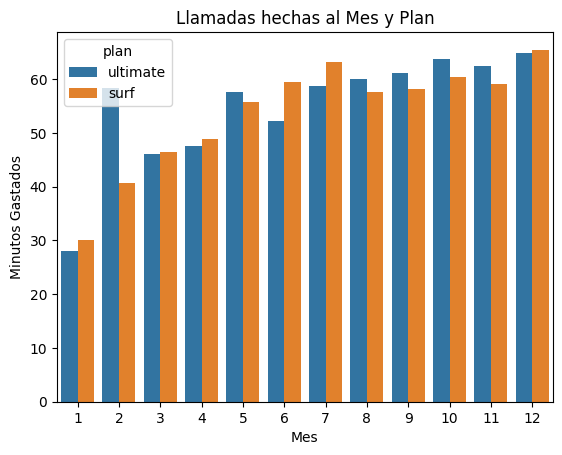

In [46]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
sns.barplot(x='mes', y='llamadas_hechas', hue='plan', data=fct_ventas, ci=None)
plt.title('Llamadas hechas al Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Minutos Gastados')

#errorbar=None
plt.show ()

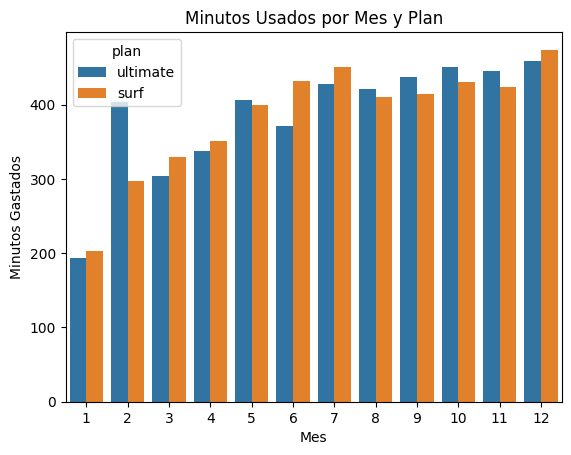

In [47]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sns.barplot(x='mes', y='minutos_usados', hue='plan', data=fct_ventas, ci=None)
plt.title('Minutos Usados por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Minutos Gastados')

plt.show ()


[En las graficas notamos que el numero de llamadas es mayor en el plan ultimate aunque en enero, marzo abril junio julio y diciembre tuvo mas demanda numero de llamadas el plan de surf y en minutos usados paso lo mismo los mese que se notaron con numero de llamada tambien se tiene los mismos meses con demanda, seguiremos analizando ya que el usuario que tiene mas derechos a tener mas minutos incluidos es el plan surf]

In [48]:
#calculando la media y la varianza de la duracion mensual de llamadas

# Filtrar los datos por plan 'surf' y 'ultimate'
minutos_surf = fct_ventas.query("plan == 'surf'")
minutos_ultimate = fct_ventas.query("plan == 'ultimate'")

# Agrupamos por el mes y calcular la media y la varianza de los minutos usados por mes para el plan surf
media_surf_mensual = minutos_surf.groupby('mes')['minutos_usados'].mean()
varianza_surf_mensual = minutos_surf.groupby('mes')['minutos_usados'].var()

# Agrupar por el mes y calcular la media y la varianza de los minutos usados por mes para el plan ultimate
media_ultimate_mensual = minutos_ultimate.groupby('mes')['minutos_usados'].mean()
varianza_ultimate_mensual = minutos_ultimate.groupby('mes')['minutos_usados'].var()

# Mostrar los resultados
print("Plan Surf:")
print(f"Media mensual de minutos:\n{media_surf_mensual}\n")
print(f"Varianza mensual de minutos:\n{varianza_surf_mensual}\n")

print("Plan Ultimate:")
print(f"Media mensual de minutos:\n{media_ultimate_mensual}\n")
print(f"Varianza mensual de minutos:\n{varianza_ultimate_mensual}\n")

Plan Surf:
Media mensual de minutos:
mes
1     203.000000
2     297.000000
3     330.000000
4     351.540000
5     399.584416
6     431.298969
7     449.983471
8     410.111111
9     414.226804
10    429.729958
11    423.325088
12    473.836478
Name: minutos_usados, dtype: float64

Varianza mensual de minutos:
mes
1     15842.000000
2     52226.500000
3     35809.363636
4     50866.743265
5     59754.219754
6     45592.628436
7     61005.099725
8     54344.645963
9     46595.958656
10    52278.664056
11    51607.021602
12    63629.518918
Name: minutos_usados, dtype: float64

Plan Ultimate:
Media mensual de minutos:
mes
1     193.500000
2     403.142857
3     304.250000
4     336.857143
5     406.241379
6     370.957447
7     427.067797
8     421.436620
9     437.511628
10    450.735849
11    445.196850
12    459.099338
Name: minutos_usados, dtype: float64

Varianza mensual de minutos:
mes
1     16572.333333
2     76889.476190
3     61984.931818
4     34888.928571
5     43841.046798
6  

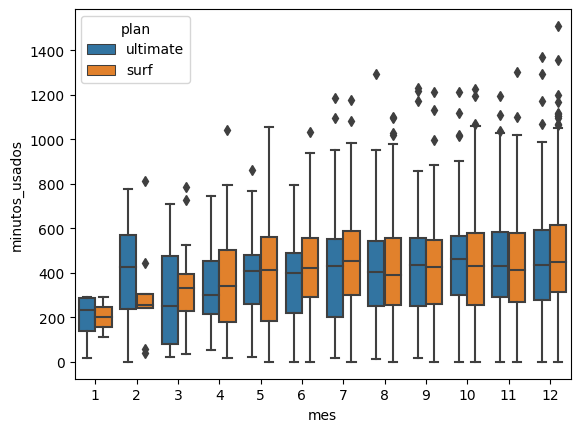

In [49]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data =fct_ventas,x='mes', y='minutos_usados',hue='plan')
plt.show ()

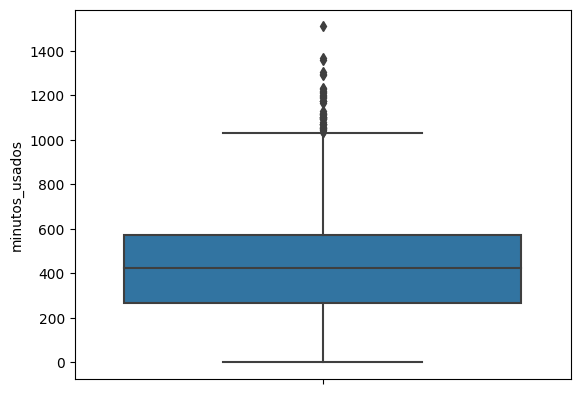

In [50]:
minutos_surf = fct_ventas.query("plan =='surf'")['minutos_usados'].reset_index(drop=True)
minutos_ultimate = fct_ventas.query("plan =='ultimate'")['minutos_usados'].reset_index(drop=True)

sns.boxplot(data =fct_ventas, y='minutos_usados',hue='plan')
plt.show ()

[sacando la viarianza y la media nos damos cuenta que la diferncia no es mucho que ver sin embargo con la grafica boxplot nos damos cuenta que en los meses de diciembre hay mas datos variables entre un plan y otro porque tiene mas valores atipico en el plan surf ya que es un paquete mas economico y con menos minutos incluidos se ven mucho mas minutos utlizados. sacando anualmentente se ve mas general los valores atipicos en general estan mas lejos de la media en el plan surf.]

### Mensajes

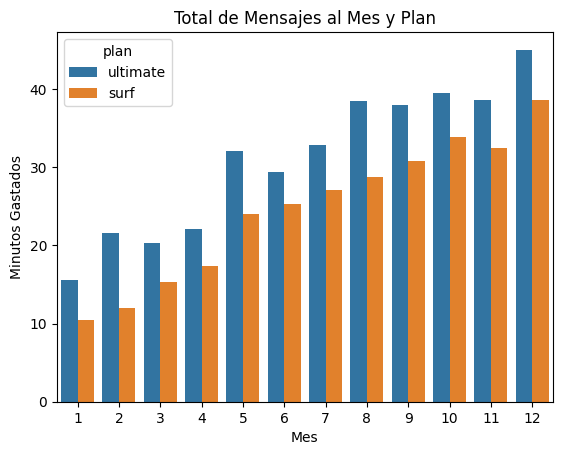

In [51]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sns.barplot(x='mes', y='total_de_mensajes', hue='plan', data=fct_ventas,ci=None )
plt.title('Total de Mensajes al Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Minutos Gastados')

plt.show ()
#error=None

In [52]:
#calculando la media y la varianza de la duracion mensual de llamadas

# Filtrar los datos por plan 'surf' y 'ultimate'
mensajes_minutos_surf = fct_ventas.query("plan == 'surf'")
mensajes_minutos_ultimate = fct_ventas.query("plan == 'ultimate'")

# Agrupamos por el mes y calcular la media y la varianza de los minutos usados por mes para el plan surf
mensajes_media_surf_mensual = mensajes_minutos_surf.groupby('mes')['total_de_mensajes'].mean()
mensajes_varianza_surf_mensual = mensajes_minutos_surf.groupby('mes')['total_de_mensajes'].var()

# Agrupar por el mes y calcular la media y la varianza de los minutos usados por mes para el plan ultimate
mensajes_media_ultimate_mensual = mensajes_minutos_ultimate.groupby('mes')['total_de_mensajes'].mean()
mensajes_varianza_ultimate_mensual = mensajes_minutos_ultimate.groupby('mes')['total_de_mensajes'].var()

# Mostrar los resultados
print("Plan Surf en Mensajes:")
print(f"Media mensual de mensajes Enviados:\n{mensajes_media_surf_mensual}\n")
print(f"Varianza mensual de Mensajes Enviados:\n{mensajes_varianza_surf_mensual}\n")

print("Plan Ultimate en Mensajes:")
print(f"Media mensual de Mensajes Enviados:\n{mensajes_media_ultimate_mensual}\n")
print(f"Varianza mensual de Mensajes Enviados:\n{mensajes_varianza_ultimate_mensual}\n")

Plan Surf en Mensajes:
Media mensual de mensajes Enviados:
mes
1     10.500000
2     12.000000
3     15.260870
4     17.400000
5     24.012987
6     25.298969
7     27.033058
8     28.777778
9     30.762887
10    33.839662
11    32.385159
12    38.600629
Name: total_de_mensajes, dtype: float64

Varianza mensual de Mensajes Enviados:
mes
1      220.500000
2      386.000000
3      346.565217
4      501.591837
5      847.197198
6      914.920103
7      923.915565
8     1029.515528
9     1003.829496
10    1275.465708
11    1065.344034
12    1458.158612
Name: total_de_mensajes, dtype: float64

Plan Ultimate en Mensajes:
Media mensual de Mensajes Enviados:
mes
1     15.500000
2     21.571429
3     20.250000
4     22.047619
5     32.103448
6     29.340426
7     32.830508
8     38.478873
9     37.895349
10    39.443396
11    38.606299
12    45.006623
Name: total_de_mensajes, dtype: float64

Varianza mensual de Mensajes Enviados:
mes
1      313.666667
2      478.285714
3      654.386364
4      

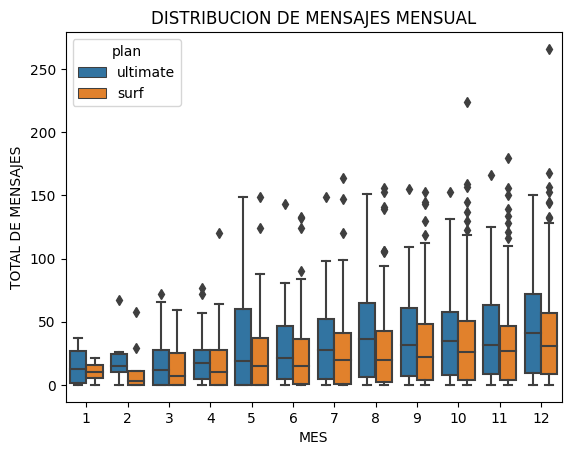

In [53]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de Mensajes

sns.boxplot(data =fct_ventas,x='mes', y='total_de_mensajes',hue='plan')
plt.title('DISTRIBUCION DE MENSAJES MENSUAL')
plt.xlabel('MES')
plt.ylabel('TOTAL DE MENSAJES')

plt.show ()

[Con la primera Tabla nos damos cuenta que mes a mes va subiendo el huzo de mensajes y el que gasta mas en mensajes es el plan ultimate al igual al sacar la media de mes y nos damos cuenta que cada mes sube la media por lo mismo del huzo de mensajes y en la tabla de boxplot nos damos cuenta que en el mes de octubre y diciembre hay muchos valores atipicos y es donde la media esta mas lejana que la media del plan surf.]

### Internet

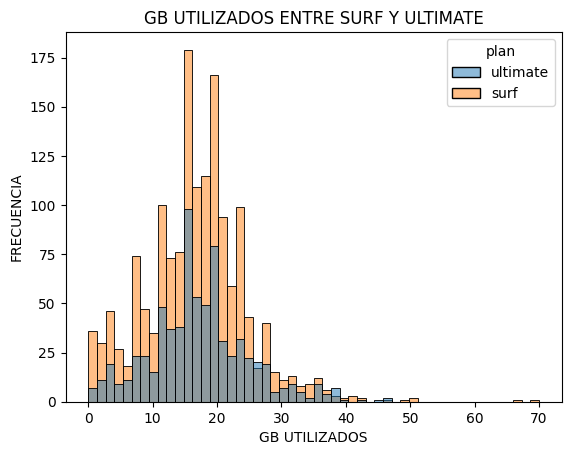

In [54]:
# Comprara el total de GB USADOS que tienden cada mes los usuarios de cada plan

sns.histplot(data =fct_ventas,x='gb_usados',hue='plan') 
plt.title('GB UTILIZADOS ENTRE SURF Y ULTIMATE')
plt.xlabel('GB UTILIZADOS')
plt.ylabel('FRECUENCIA')
plt.show ()

[En esta grafica nos damos que el plan que utiliza que mas GB de internet es el plan surf y ambos planes consumen mas de entre 17 a 20 GB que son los puntos mas altos de Gb que se utiliza despues de esos GB va bajando el huzo de GB]

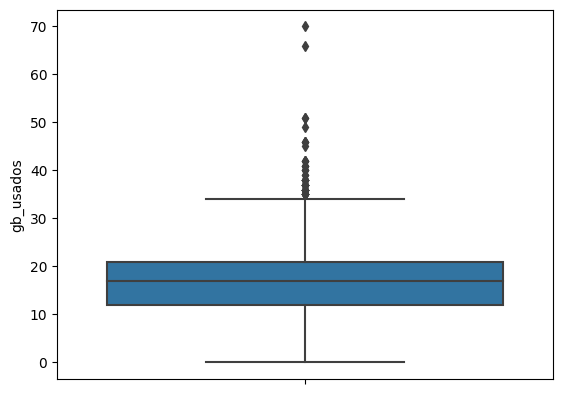

In [55]:
gb_surf = fct_ventas.query("plan =='surf'")['gb_usados'].reset_index(drop=True)
gb_ultimate = fct_ventas.query("plan =='ultimate'")['gb_usados'].reset_index(drop=True)

sns.boxplot(data =fct_ventas, y='gb_usados',hue='plan')
plt.show ()

In [56]:
# Calcula la media y la varianza de los GB usados anual.
print(f"La Media de minutos de plan surf {gb_surf.mean()}")
print(f"La Varianza de minutos de plan surf {gb_surf.var()}")
print()
print(f"La Media de minutos de plan ultimate {gb_ultimate.mean()}")
print(f"La Varianza de minutos de plan ultimate {gb_ultimate.var()}")

La Media de minutos de plan surf 16.68467895740623
La Varianza de minutos de plan surf 61.65496231734954

La Media de minutos de plan ultimate 17.334722222222222
La Varianza de minutos de plan ultimate 58.940656390047906


In [57]:
#calculando la media y la varianza de la duracion mensual de Internet 

# Filtrar los datos por plan 'surf' y 'ultimate'
minutos_surf = fct_ventas.query("plan == 'surf'")
minutos_ultimate = fct_ventas.query("plan == 'ultimate'")

# Agrupamos por el mes y calcular la media y la varianza de los minutos usados por mes para el plan surf
media_surf_mensual = minutos_surf.groupby('mes')['gb_usados'].mean()
varianza_surf_mensual = minutos_surf.groupby('mes')['gb_usados'].var()

# Agrupar por el mes y calcular la media y la varianza de los minutos usados por mes para el plan ultimate
media_ultimate_mensual = minutos_ultimate.groupby('mes')['gb_usados'].mean()
varianza_ultimate_mensual = minutos_ultimate.groupby('mes')['gb_usados'].var()

# Mostrar los resultados
print("Plan Surf:")
print(f"Media mensual de GB USADOS:\n{media_surf_mensual}\n")
print(f"Varianza mensual de GB USADOS:\n{varianza_surf_mensual}\n")

print("Plan Ultimate:")
print(f"Media mensual de GB USADOS:\n{media_ultimate_mensual}\n")
print(f"Varianza mensual de GB USADOS:\n{varianza_ultimate_mensual}\n")

Plan Surf:
Media mensual de GB USADOS:
mes
1      5.000000
2     12.222222
3     13.565217
4     12.220000
5     14.116883
6     15.484536
7     16.909091
8     16.895062
9     16.695876
10    17.426160
11    16.459364
12    18.248428
Name: gb_usados, dtype: float64

Varianza mensual de GB USADOS:
mes
1     18.000000
2     41.444444
3     63.984190
4     56.215918
5     58.183527
6     47.752363
7     61.500000
8     71.622460
9     49.176460
10    61.042194
11    54.575471
12    69.240928
Name: gb_usados, dtype: float64

Plan Ultimate:
Media mensual de GB USADOS:
mes
1      7.250000
2     17.285714
3     18.416667
4     16.333333
5     16.862069
6     15.468085
7     16.491525
8     17.887324
9     17.069767
10    17.726415
11    17.149606
12    18.430464
Name: gb_usados, dtype: float64

Varianza mensual de GB USADOS:
mes
1      14.916667
2      37.904762
3     138.628788
4      85.833333
5      54.194581
6      69.384829
7      64.254237
8      57.787123
9      47.124487
10     54.73

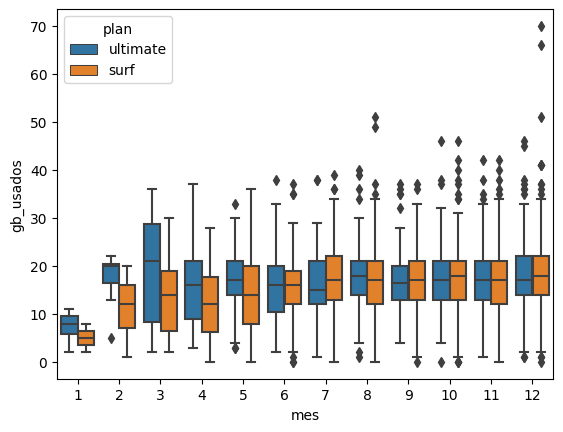

In [58]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de GB USADOS

sns.boxplot(data =fct_ventas,x='mes', y='gb_usados',hue='plan')

plt.show ()

## Ingreso

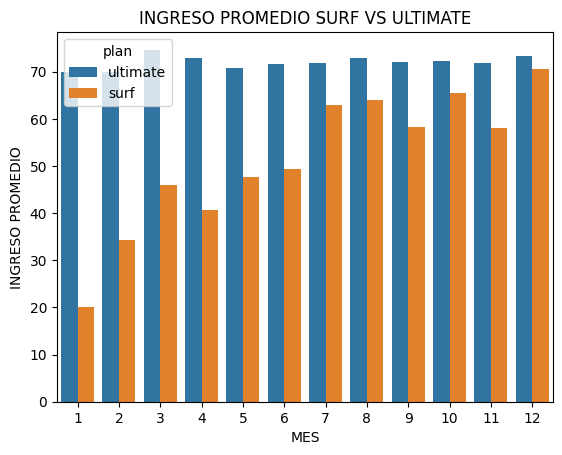

In [59]:
sns.barplot(x='mes', y='ingreso_mensual', hue='plan', data=fct_ventas, ci=None)
plt.title('INGRESO PROMEDIO SURF VS ULTIMATE')
plt.xlabel('MES')
plt.ylabel('INGRESO PROMEDIO')

plt.show ()


In [67]:
sum_ingreso_mensual=fct_ventas.pivot_table(index=['plan','mes'],
                         values='ingreso_mensual',
                         aggfunc=['sum'])
sum_ingreso_mensual.columns = ['suma_ingresos_mensuales']
sum_ingreso_mensual.reset_index(inplace=True)

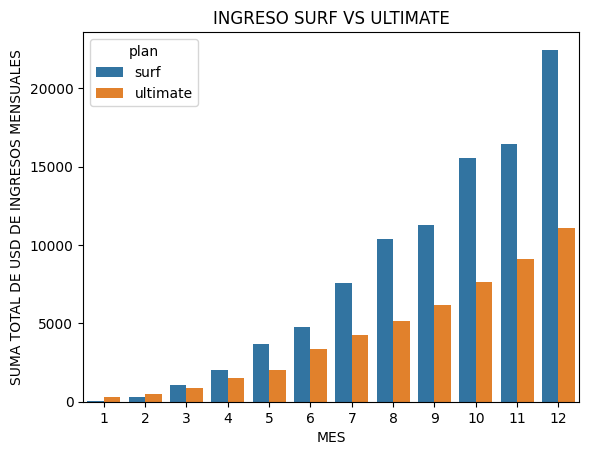

In [68]:
sns.barplot(x='mes', y='suma_ingresos_mensuales', hue='plan', data=sum_ingreso_mensual, ci=None)

plt.title('INGRESO SURF VS ULTIMATE')
plt.xlabel('MES')
plt.ylabel('SUMA TOTAL DE USD DE INGRESOS MENSUALES')

plt.show ()

In [69]:
# Filtrar los datos por plan 'surf' y 'ultimate'
ingresos_surf = fct_ventas.query("plan == 'surf'")
ingresos_ultimate = fct_ventas.query("plan == 'ultimate'")

# Agrupar por el mes y calcular la media y la varianza de los ingresos mensuales por mes para el plan surf
media_ingresos_surf = ingresos_surf.groupby('mes')['ingreso_mensual'].mean()
varianza_ingresos_surf = ingresos_surf.groupby('mes')['ingreso_mensual'].var()

# Agrupar por el mes y calcular la media y la varianza de los ingresos mensuales por mes para el plan ultimate
media_ingresos_ultimate = ingresos_ultimate.groupby('mes')['ingreso_mensual'].mean()
varianza_ingresos_ultimate = ingresos_ultimate.groupby('mes')['ingreso_mensual'].var()

# Mostrar los resultados
print("Plan Surf:")
print(f"Media mensual de ingresos:\n{media_ingresos_surf}\n")
print(f"Varianza mensual de ingresos:\n{varianza_ingresos_surf}\n")

print("Plan Ultimate:")
print(f"Media mensual de ingresos:\n{media_ingresos_ultimate}\n")
print(f"Varianza mensual de ingresos:\n{varianza_ingresos_ultimate}\n")

Plan Surf:
Media mensual de ingresos:
mes
1     20.000000
2     34.396667
3     45.941304
4     40.710600
5     47.628182
6     49.276289
7     62.839339
8     64.054630
9     58.271495
10    65.590000
11    58.110283
12    70.651384
Name: ingreso_mensual, dtype: float64

Varianza mensual de ingresos:
mes
1        0.000000
2      428.276100
3     1512.023512
4     1198.958402
5     1967.540055
6     1988.914046
7     2946.512845
8     3602.397286
9     2260.644980
10    3224.282236
11    2497.096993
12    4604.702184
Name: ingreso_mensual, dtype: float64

Plan Ultimate:
Media mensual de ingresos:
mes
1     70.000000
2     70.000000
3     74.666667
4     73.000000
5     70.724138
6     71.638298
7     71.898305
8     72.859155
9     72.034884
10    72.311321
11    71.763780
12    73.337748
Name: ingreso_mensual, dtype: float64

Varianza mensual de ingresos:
mes
1       0.000000
2       0.000000
3     145.515152
4     120.400000
5      15.206897
6      75.018501
7     104.472238
8     15

[En promedio el plan ultimate es regular su ingresos varian entre 70 a 73.3 usd mensual ya que no puede bajar porque su plan es de 70usd sin embargo el plan surf varia entre 20 usd a 70.65usd y su plan su precio es de 20usd ya que el plan surf gasta casi lo mismo en o mas GB, mensajes y llamadas se encarece su plan por los extra que tiene a compraracion de ultimate y el ingreso entre plan ultimate y surf ha mas usuarios gastando en el plan surf que el ultimate ya que en solo el mes de diciembre de 22467.14USD siendo el ingreso mas alto al año no sabemos si apenas inicio la empresa o porque la creciente del plan pero da mucho que pensar en el plan surf para futuro ]

## Prueba las hipótesis estadísticas

# Prueba las hipótesis #1
HO: el ticket promedio de surf NO es > al ticket promedio de ultimate

H1:el ticket promedio de surf > al ticket promedio de ultimate

In [70]:
ventas_surf = fct_ventas.query('plan=="surf"')['ingreso_mensual']
ventas_ultimate =fct_ventas.query('plan=="ultimate"')['ingreso_mensual']

In [71]:
resultado = st.ttest_ind(ventas_surf, ventas_ultimate, equal_var=False)

In [72]:
alpha =0.02

In [73]:
print('valor p:', resultado.pvalue)

valor p: 5.1234033722748e-15


In [74]:
# Prueba las hipótesis

if resultado.pvalue < alpha:
    print('Podemos rechazar la hipotesis nula H0')

else:
    prin('NO podemos rechazar la hipotesis nula')

Podemos rechazar la hipotesis nula H0


In [75]:
ventas_surf.describe()

count    1573.000000
mean       60.795410
std        55.450334
min        20.000000
25%        20.000000
50%        40.510000
75%        80.420000
max       590.370000
Name: ingreso_mensual, dtype: float64

# Prueba las hipótesis #2 el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
H0 = El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

H1 = El ingreso promedio de los usuarios del área NY-NJ NO es diferente al de los usuarios de otras regiones.

Se concluye que el ingreso promedio de los usuarios difiere según la ubicación.

In [76]:
ny_jn = fct_ventas[fct_ventas['city'].str.contains('ny-nj')]['ingreso_mensual']
ciudades_no_nyjn = fct_ventas[~fct_ventas['city'].str.contains('ny-nj')]['ingreso_mensual']

In [77]:
resultado_dos = st.ttest_ind(ny_jn, ciudades_no_nyjn, equal_var=False)

In [78]:
alpha_dos =0.02

In [79]:
print('valor p:', resultado_dos.pvalue)

valor p: 0.03408041222493359


In [80]:
# Prueba las hipótesis

if resultado_dos.pvalue < alpha_dos:
    print('Podemos rechazar la hipotesis nula H0')

else:
    print('NO podemos rechazar la hipotesis nula')

NO podemos rechazar la hipotesis nula


H1 = El ingreso promedio de los usuarios del área NY-NJ NO es diferente al de los usuarios de otras regiones.

## Conclusión general

1.-primero hicimos la limpieza de los datos en General buscar si habia duplicados o ausentes y se corriguio

2.-se hizo un estudio de comportamiento de usuarios en llamadas, mensajes e internet para saber que usuario tenia mas gasto de cada uno de los apartados(llamadas, mensajes e internet)en el cual el estudio salio que el que mas gastaba en llamadas, mensajes e internet y cual es el ingreso por cada plan mensual.

3.-se hizo una tabla madre usando merge y se juntaron las columnas que hicimos de analisis y limpieza revisamos si habia datos ausentes lo corregimos, redondeamos los MB y GB se hizo al final el ingreso mensual por paquete y se acoplo con la tabla madre 

4.-se hizo tabla para su facil visualizacion de los datos que se sacaron como la media y ver que ambos tenian gastos muy similares pero teniendo presente que el plan surf es mas economico y notamos que tuvo muchos gastos extras a comparacion de ultimate en ambas partes

5.- Al llegar a la parte de analisis de ingresos no damos cuenta que el que menos extra tuvo en su paquete fue ultimate

6.- en el mismo analisis se ve en la grafica como el plan surf hay mas ingresos no sabemos el porque ya sea aya iniciado la empresa, sea un nuevo paquete etc... sin embargo ahi hay un punto que se puede ver como una oportunidad de implementar ya sabran los ejecutivos de que manera ya sea mas publicidad para que haya mas gente en tener ese paquete ya que a pesar que gastan menos al mes en su paquete siempre tiene extras y eso le conviene a la empresa pero bueno lo dejare a critero de especialistas

7.-para concluir los analisis previos de tablas medias varianzas concluimos con la prueba de hipotesis cual de las dos opciones es mejor y nuestro resultado salio que el **PAQUETE SURF ES TIENE MAYOR INGRESOS PROMEDIOS AL PAQUETE ULTIMATE CON UNA CERTEZA DE 98%** 

8.-Tambien se nos pidio que se analizara si habia alguna diferencia de las personas que contratan paquetes en NY-NJ que fue la respuesta de la segunda hipotesis que nos dice que El **ingreso promedio de los usuarios del área NY-NJ no es diferente al de los usuarios de otras regiones**. 
 

### Comentario Final del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has realizado un análisis exhaustivo de los datos, logrando responder claramente la pregunta sobre cuál tarifa genera más ingresos, lo cual es fundamental para la estrategia de la empresa. Destaco a continuación los aspectos positivos y algunas sugerencias de mejora y temas de exploración futura:

#### Puntos Positivos:
- **Corrección y limpieza de datos**: Has cubierto una revisión general de valores ausentes y duplicados, ajustando adecuadamente formatos de fechas y redondeos, lo que permite un análisis preciso y limpio.
- **Enriquecimiento de datos**: Creaste nuevas columnas como "minutos_cobrables", "mensajes_cobrables" y "gb_cobrables" que agregan valor a los datos, facilitando el análisis y mejorando la claridad de los resultados.
- **Análisis exploratorio visual y estadístico**: Las gráficas y las pruebas de hipótesis ayudan a visualizar y confirmar diferencias entre las tarifas de manera efectiva.
- **Pruebas de hipótesis detalladas**: La aplicación de pruebas de hipótesis agrega rigor estadístico, ayudando a sustentar la conclusión final sobre el plan de mayor ingreso.

#### Áreas para Seguir Investigando:
- **Optimización con métodos vectorizados**: Explorar el uso de métodos como `where()` en lugar de `apply` podría agilizar el procesamiento de datos. Al igual que mencionaste, aplicar `where()` puede ser de gran ayuda para operaciones condicionales, como el cálculo de "minutos_cobrables" o "mensajes_cobrables".
- **Análisis de ingresos regional**: Profundizar en el comportamiento de clientes en otras regiones, además de NY-NJ, podría mostrar patrones de ingreso adicionales útiles para segmentar estrategias de mercado.
- **Automatización del proceso de gráficos**: Considera implementar un enfoque modular para tus gráficos, especialmente al comparar tarifas. Esto facilitará la reutilización del código y dará lugar a gráficos más dinámicos.
- **Modelos predictivos**: Podrías explorar modelos de predicción para anticipar el comportamiento de clientes en cuanto a consumo de minutos, mensajes y datos, basándote en el análisis actual.

Continúa desarrollando tus habilidades y conocimientos; estás en el camino correcto para convertirte en un experto en ciencia de datos. ¡Buen trabajo y sigue avanzando! 💪🚀😊
</div>